In [22]:
import pandas as pd
# Propósito: CORRESPONDENCIAS MÚLTIPLES
import prince

In [23]:
#CARGA DE TABLAS
ATENCIONES=pd.read_csv(r"E:\ruben\dataton_minsa\DATATON - MINSA 2023\HIS MINSA\DTS_DIGTEL_METAXENICAS\TB_DIGTEL_METAXENICAS_ATENCIONES.csv")
ATENDIDOS=pd.read_csv(r"E:\ruben\dataton_minsa\DATATON - MINSA 2023\HIS MINSA\DTS_DIGTEL_METAXENICAS\TB_DIGTEL_METAXENICAS_ATENDIDOS.csv")
PROCEDIMIENTOS=pd.read_csv(r"E:\ruben\dataton_minsa\DATATON - MINSA 2023\HIS MINSA\DTS_DIGTEL_METAXENICAS\TB_DIGTEL_METAXENICAS_PROCEDIMIENTOS.csv")
TAMIZAJES=pd.read_csv(r"E:\ruben\dataton_minsa\DATATON - MINSA 2023\HIS MINSA\DTS_DIGTEL_METAXENICAS\TB_DIGTEL_METAXENICAS_TAMIZAJES.csv")
TRATAMIENTOS=pd.read_csv(r"E:\ruben\dataton_minsa\DATATON - MINSA 2023\HIS MINSA\DTS_DIGTEL_METAXENICAS\TB_DIGTEL_METAXENICAS_TRATAMIENTOS.csv")

In [24]:
atn=ATENCIONES
atd=ATENDIDOS
prc=PROCEDIMIENTOS
tmz=TAMIZAJES
trt=TRATAMIENTOS

In [25]:
# Eliminar los registros con datos vacíos
def elim_registro (df,col):
    for k in col:
        condicion = df[k].isnull()
        filas_seleccionadas = df.loc[condicion]
        # Eliminar las filas seleccionadas
        df.drop(filas_seleccionadas.index, inplace=True)
    return df.head(3)        

In [26]:
# columnas=['id_persona', 'Edad', 'Tipo_edad', 'Sexo', 'id_ubigeo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'id_eess', 'Lab']
columnas1=['id_persona', 'Sexo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'id_eess', 'Lab']

elim_registro(atn,columnas1)
elim_registro(atd,columnas1)
elim_registro(prc,columnas1)
elim_registro(tmz,columnas1)

columnas2=['id_persona', 'Sexo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'id_eess', 'Lab_Dx', 'Cod_Tx', 'Lab_Tx']
elim_registro(trt,columnas2)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Lab_Dx,Cod_Tx,Lab_Tx
0,41834308,1,A,F,1473.0,20190621,00a-11a,B519,P,107,RP,U310,1
1,41846231,4,A,F,1473.0,20190610,00a-11a,B509,D,7412,RP,U310,01
3,41830730,1,A,M,1472.0,20190719,00a-11a,B519,D,104,RP,U310,1


In [27]:
# Renombrar la columna
trt = trt.rename(columns={'Lab_Dx': 'Lab'})

In [28]:
# Convertir a cadena la columna Fecha_atencion
def CadenaFecha (df,col):
    df["Fecha_cadena"]=df[col].astype(str)
    return df

    # Separar año y mes
def annual (df,fechaCad):
    # Extraer año
    df['anhio'] = df[fechaCad].str.slice(stop=4)
    # Extraer mes
    df['mescad'] = df[fechaCad].str.slice(start=4, stop=6)
    return df
# Copiar columna "mescad" en otra columna llamada "Trimestre"
def crea_trimestre (df,mesCad):
    df["Trimestre"]=df[mesCad]
    return df
# Los valores iniciales de meses contenidos en la columna "Trimestre" se transforman al trimestre correspondiente, propiamente dicho
def trimestral (df,fechaMes):
    df["Trimestre"] = df["Trimestre"].replace({"01":"01", "02":"01", "03": "01", "04": "02", "05": "02", "06": "02", "07": "03", "08": "03", "09": "03", "10": "04", "11": "04", "12": "04"})
    return df

# Creación de las tablas finales seleccionando solamente las columnas pertinentes
def df0_gen (df,col):
    df01=df.loc[:,col]
    return df01

In [29]:
# Convertir a texto la columna Fecha_atencion
atn_cadF=CadenaFecha(atn,"Fecha_atencion")
atd_cadF=CadenaFecha(atd,"Fecha_atencion")
prc_cadF=CadenaFecha(prc,"Fecha_atencion")
tmz_cadF=CadenaFecha(tmz,"Fecha_atencion")
trt_cadF=CadenaFecha(trt,"Fecha_atencion")

# Crea columnas mes y anhio
atn_annual=annual(atn_cadF,"Fecha_cadena")
atd_annual=annual(atd_cadF,"Fecha_cadena")
prc_annual=annual(prc_cadF,"Fecha_cadena")
tmz_annual=annual(tmz_cadF,"Fecha_cadena")
trt_annual=annual(trt_cadF,"Fecha_cadena")

# Crea columna trimestre
atn_trim=crea_trimestre (atn_annual,"mescad")
trt_trim=crea_trimestre (trt_annual,"mescad")

# Transformación a trimestre
atn_trim=trimestral(atn_annual,"mescad")
trt_trim=trimestral(trt_annual,"mescad")

In [30]:
# Lista de columnas pertinentes por tabla
atn_col=['Diagnostico', 'Sexo', 'Trimestre', 'Etapa', 'Tipo_Dx'] 
atd_col=['Sexo', "anhio", 'Etapa', 'Lab'] 
prc_col=['Diagnostico', 'Sexo', "anhio", 'Etapa', 'Lab'] 
tmz_col=['Diagnostico', 'Sexo', "anhio", 'Etapa', 'Lab']
trt_col=['Diagnostico', 'Sexo', 'Trimestre', 'Etapa', 'Tipo_Dx', 'Cod_Tx']

In [31]:
# Obtención de las tablas finales para ACM
atn_0=df0_gen(atn_trim,atn_col)
atd_0=df0_gen(atd_annual,atd_col)
prc_0=df0_gen(prc_annual,prc_col)
tmz_0=df0_gen(tmz_annual,tmz_col)
trt_0=df0_gen(trt_trim,trt_col)

In [32]:
# Conversión a variables de tipo dummy
def df_dummy (df,col):
    df_dummies = pd.get_dummies(df[col])
    return df_dummies

# Eliminar columnas "cero"
def df_nocero (df):
    df = df.drop(columns=[col for col in df if df[col].eq(0).all()])
    return df


In [33]:
# Tablas dummy
atn_d=df_dummy(atn_0,atn_col)
atd_d=df_dummy(atd_0,atd_col)
prc_d=df_dummy(prc_0,prc_col)
tmz_d=df_dummy(tmz_0,tmz_col)
trt_d=df_dummy(trt_0,trt_col)

# Tablas finales - procesamiento ACM
atn_acm=df_nocero(atn_d)
atd_acm=df_nocero(atd_d)
prc_acm=df_nocero(prc_d)
tmz_acm=df_nocero(tmz_d)
trt_acm=df_nocero(trt_d)





In [34]:
# Graficar el resultado del ACM usando matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def procesamiento_ACM(df,categorias):
    # Instanciamiento, Procesamiento, Interacción entre las variables, solamente coordenadas de las columnas
    mca=prince.MCA()
    mca=mca.fit(df)
    xy = mca.column_coordinates(df)
    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(6, 12))
    # Graficar las coordenadas de las columnas como puntos rojos
    ax.scatter(
        xy[0], # Coordenada en el eje horizontal
        xy[1], # Coordenada en el eje vertical
        color='red', # Color de los puntos
        marker='s', # Forma de los puntos
        alpha=0.5, # Transparencia de los puntos
        #label=list(df.columns) # Etiqueta para la leyenda
    )
    # Añadir la leyenda, el título y las etiquetas de los ejes
    ax.legend()
    ax.set_title('Análisis de correspondencia múltiple')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    # Mostrar la figura
    plt.show()
    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


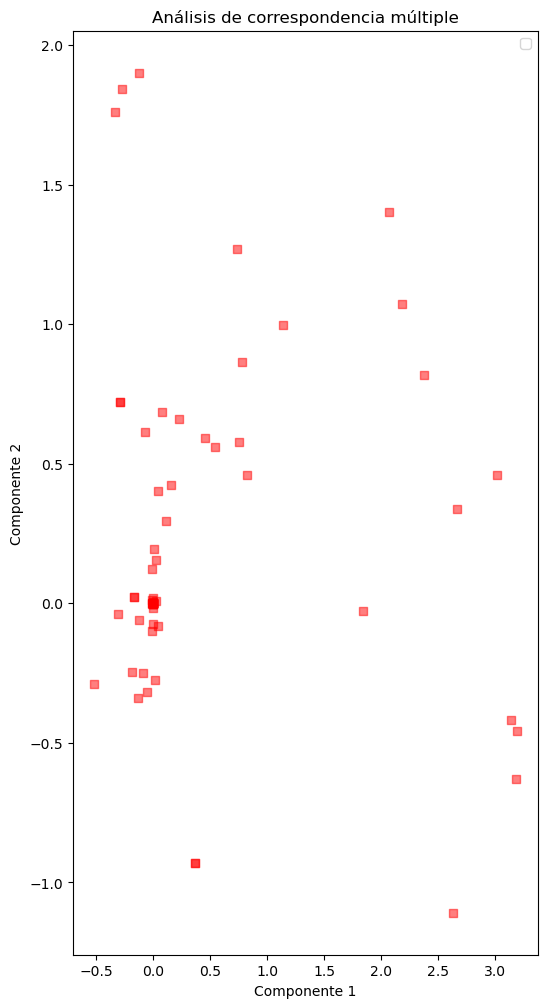

In [35]:
# ATENCIONES
procesamiento_ACM(atn_acm,atn_col)
#atn_col=['Diagnostico', 'Sexo', 'Trimestre', 'Etapa', 'Tipo_Dx']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


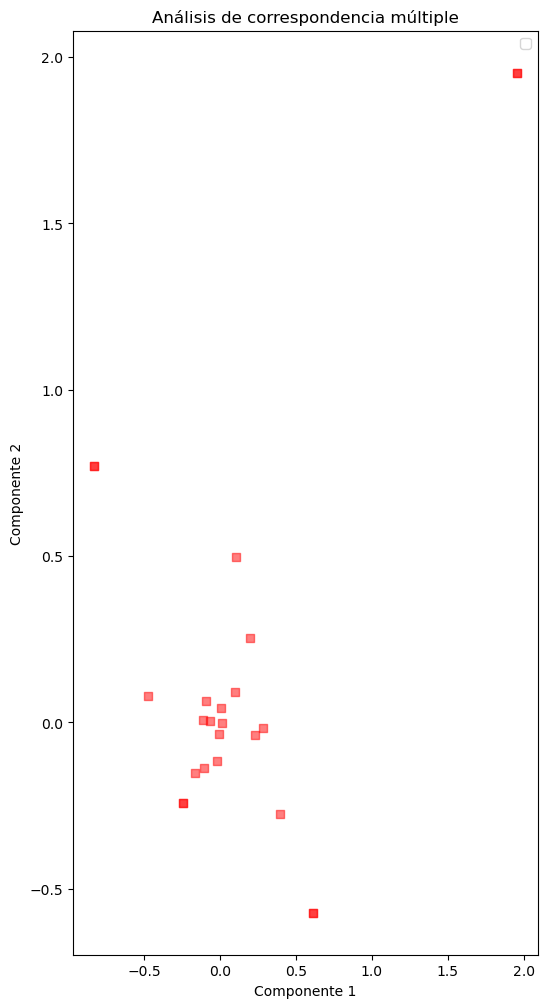

In [36]:
# ATENDIDOS
procesamiento_ACM(atd_acm,atd_col)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


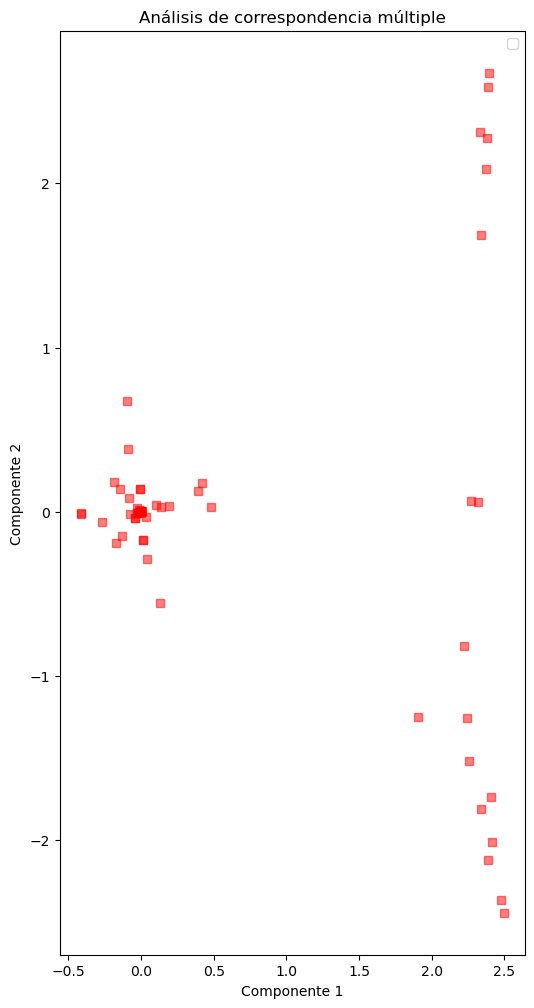

In [37]:
# PROCEDIMIENTOS
procesamiento_ACM(prc_acm,prc_col)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


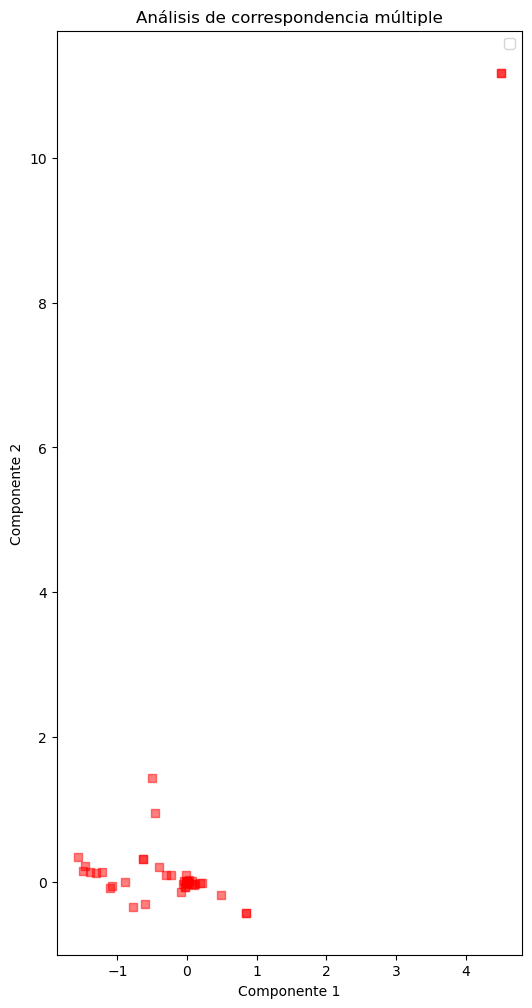

In [38]:
# TAMIZAJES
procesamiento_ACM(tmz_acm,tmz_col)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


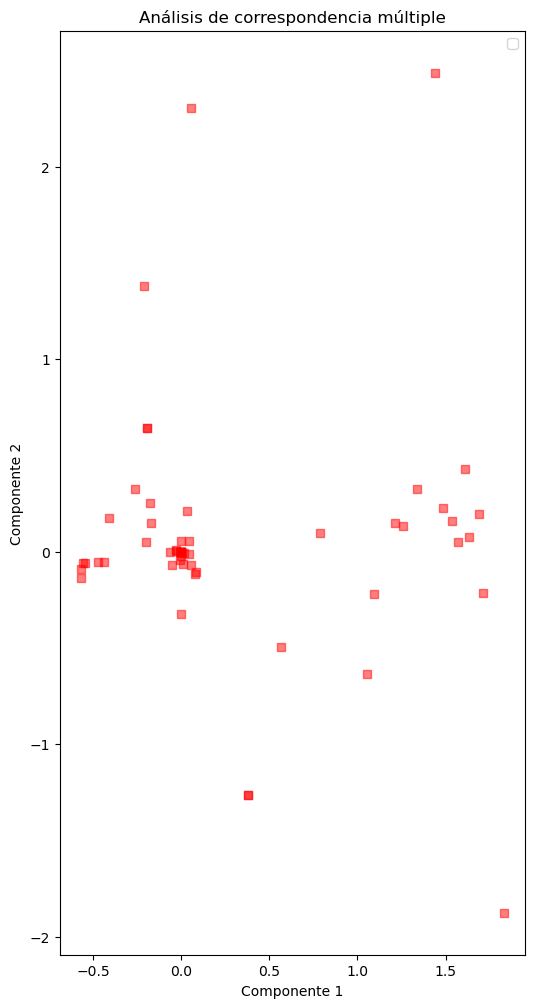

In [39]:
# TRATAMIENTOS
procesamiento_ACM(trt_acm,trt_col)

In [40]:
# Muestra en R
def ConvierteAcsv (df,txt_nombre):
    ruta="E:/ruben/dataton_minsa/" + txt_nombre + ".csv"
    df.to_csv(ruta)
    return

In [41]:
ConvierteAcsv(atn_0,"atn_0")
ConvierteAcsv(atn_acm,"atn_acm")

In [43]:
ruta="E:\ATENCIONES_0.csv"
atn_0.to_csv(ruta, index=False)

ruta="E:\ATENDIDOS_0.csv"
atd_0.to_csv(ruta, index=False)

ruta="E:\PROCEDIMIENTOS_0.csv"
atn_0.to_csv(ruta, index=False)

ruta="E:\TAMIZAJES_0.csv"
prc_0.to_csv(ruta, index=False)

ruta="E:\TRATAMIENTOS_0.csv"
trt_0.to_csv(ruta, index=False)